<a href="https://colab.research.google.com/github/Avit-hodibu/Unsupervisied_learning/blob/main/Unsupervise_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K - Means Clustering

- unsupervised learning where you make cluster.

problem - We have tell the algorithm that how many cluster we need to make.

Steps:

1. decide n clusters

2. init centroids: make any point randomly as center points of each n cluster

3. Assign cluster: each centroids make each cluster using euclidean distance.

4. Move centriods: since you make new cluster. So, the center point also change. According to it we make new centriods of each cluster. we use mean

5. if centriods does move from before centriods then repeat 3 and 4



how to know how many cluster it will make?
-> use elbow method

we make graph where one side we have y axis number of clusters and X axis WCSS(with in cluster sum of square distance ) inertia.

we calcu the distance of centriod from each points and do square of distance is WCSS.

we increase the centeriod number or cluster one by one and plot the graph

we pick the elbow point of the graph. that is the number of cluster it will have.



In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


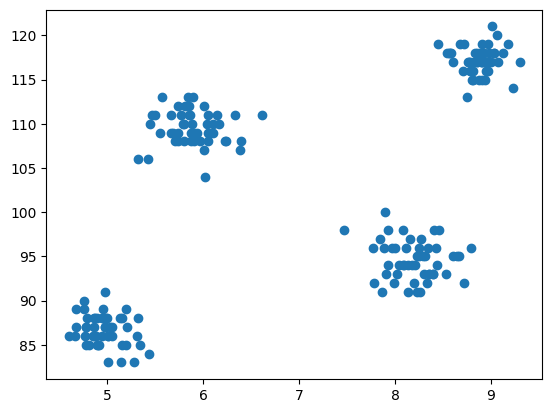

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'])

In [3]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


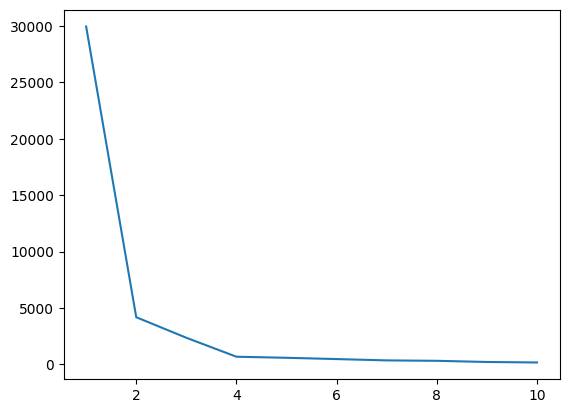

In [4]:
plt.plot(range(1,11), wcss)

Using elbow method we know that there is 4 cluster from the dip and elbow lies there.


In [25]:
X= df.iloc[:, :].values
kmeans = KMeans(n_clusters=4)
y_means=kmeans.fit_predict(X)

In [26]:
y_means

array([3, 2, 0, 0, 2, 2, 0, 1, 2, 0, 3, 2, 0, 3, 2, 0, 2, 0, 2, 2, 0, 3,
       0, 3, 3, 0, 3, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 3, 2, 3, 0, 0, 3,
       1, 1, 0, 2, 1, 2, 3, 3, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 3, 1,
       0, 3, 2, 0, 2, 1, 0, 3, 2, 1, 2, 1, 3, 0, 0, 1, 2, 3, 1, 3, 1, 2,
       1, 2, 1, 1, 0, 3, 0, 0, 1, 0, 3, 1, 2, 3, 3, 1, 3, 3, 0, 3, 1, 1,
       0, 1, 2, 2, 0, 1, 0, 2, 1, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 0, 0, 2,
       3, 3, 2, 1, 2, 3, 0, 0, 0, 3, 2, 3, 3, 1, 3, 1, 2, 3, 1, 3, 1, 1,
       3, 0, 2, 1, 2, 0, 3, 1, 2, 0, 1, 3, 2, 3, 3, 1, 1, 2, 1, 3, 3, 0,
       1, 2, 3, 1, 1, 2, 2, 2, 0, 3, 0, 0, 1, 2, 0, 0, 3, 3, 0, 3, 1, 2,
       2, 1], dtype=int32)

In [28]:
X[y_means==0, 1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

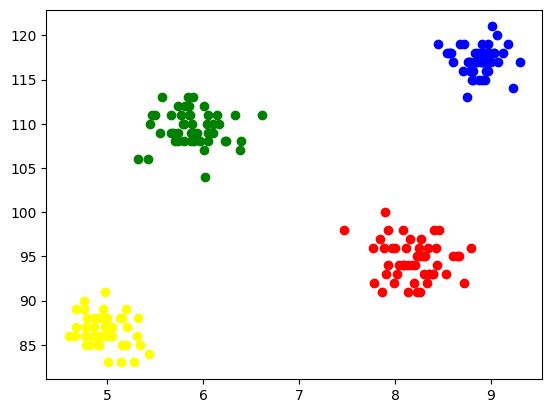

In [29]:
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], color='red', label='cluster 1')
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], color='blue', label='cluster 2')
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], color='green', label='cluster 3')
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], color='yellow', label='cluster 4')

**From scratch **

In [ ]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)


KMeans does not work well different types of cluster data.

# Hierarchical Clustering
method of clustering analysis that seeks to build a hierarchy of clusters i.e. tree-type structure based on the hierarchy.

 connectivity-based clustering model that groups the data points together that are close to each other based on the measure of similarity or distance

Types of hierarchical Clustering:
1. Agglomerative clustering
2. Divisive CLustering

# Density based clustering

DBSCAN